In [1]:
#imports

import requests #used for scrapping the website
import numpy as np
from bs4 import BeautifulSoup # used to scrap the website
import pandas as pd
import string #NLP
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\91808\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
base_url="https://www.airlinequality.com/airline-reviews/british-airways"
pages=37
page_size=100

reviews=[]

for i in range(1,pages+1):
    print(f"Scrapping page{i}")
    
    #create URL to Collect links from paginated data
    url=f"{base_url}/page{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    
    #collect HTML data from this page
    response=requests.get(url)
    
    #parse content
    content=response.content
    parsed_content=BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div",{"class":"text_content"}):
        reviews.append(para.get_text())
        
    print(f" ------> {len(reviews)} total reviews")
    
df=pd.DataFrame()
df["reviews"]=reviews
df
df.to_csv("BA_reviews.csv")
    
    

Scrapping page1
 ------> 100 total reviews
Scrapping page2
 ------> 200 total reviews
Scrapping page3
 ------> 300 total reviews
Scrapping page4
 ------> 400 total reviews
Scrapping page5
 ------> 500 total reviews
Scrapping page6
 ------> 600 total reviews
Scrapping page7
 ------> 700 total reviews
Scrapping page8
 ------> 800 total reviews
Scrapping page9
 ------> 900 total reviews
Scrapping page10
 ------> 1000 total reviews
Scrapping page11
 ------> 1100 total reviews
Scrapping page12
 ------> 1200 total reviews
Scrapping page13
 ------> 1300 total reviews
Scrapping page14
 ------> 1400 total reviews
Scrapping page15
 ------> 1500 total reviews
Scrapping page16
 ------> 1600 total reviews
Scrapping page17
 ------> 1700 total reviews
Scrapping page18
 ------> 1800 total reviews
Scrapping page19
 ------> 1900 total reviews
Scrapping page20
 ------> 2000 total reviews
Scrapping page21
 ------> 2100 total reviews
Scrapping page22
 ------> 2200 total reviews
Scrapping page23
 ------> 23

In [3]:
#Read Dataset
reviews=pd.read_csv("BA_reviews.csv")
reviews=reviews.pop('reviews')
reviews

0       ✅ Trip Verified |  Check in fast and friendly....
1       ✅ Trip Verified |  This is the first time I ha...
2       ✅ Trip Verified |  Flew business class from Do...
3       ✅ Trip Verified |  Starting off at Heathrow Te...
4       Not Verified |  We have flown this route with ...
                              ...                        
3695    LHR to BOS. Day after baggage shut down but Fi...
3696    LHR-ARN. All the procedures at Heathrow termin...
3697    LGW to AMS. Easy check-in at Gatwick with the ...
3698    I really do not have the energy to write very ...
3699    Flew in Club World for the first time on the n...
Name: reviews, Length: 3700, dtype: object

In [4]:
#check the length of total reviews extracted
len(reviews)

3700

In [7]:
#Clean Text

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text=text.replace(punctuation,'')
    return text

reviews=reviews.str.replace('Trip Verified |', '')
reviews=reviews.str.replace('✅ ','')
reviews=reviews.str.replace('|','')
reviews=reviews.str.replace(r'\b(\w{1,3})\b','')
reviews=reviews.apply(remove_punctuations)
reviews

C:\Users\91808\AppData\Local\Temp\ipykernel_11856\3456266699.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews=reviews.str.replace('Trip Verified |', '')
C:\Users\91808\AppData\Local\Temp\ipykernel_11856\3456266699.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  reviews=reviews.str.replace('|','')
C:\Users\91808\AppData\Local\Temp\ipykernel_11856\3456266699.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews=reviews.str.replace(r'\b(\w{1,3})\b','')


0         Check  fast  friendly Security  breeze Loung...
1         This   first time  have seen   Club World su...
2         Flew business class from Doha  London  31st ...
3         Starting   Heathrow Terminal  Check   fairly...
4        Verified    have flown this route with EasyJe...
                              ...                        
3695        after baggage shut down  First check  easy...
3696       procedures  Heathrow terminal  were  breeze...
3697       Easy check  Gatwick with  pods  check   pri...
3698     really   have  energy  write very detail     ...
3699    Flew  Club World   first time     A380s  disap...
Name: reviews, Length: 3700, dtype: object

In [8]:
reviews.shape

(3700,)

In [9]:
#print 50 most commonly used words
freq_words=pd.Series(''.join(reviews).lower().split()).value_counts()[:50]
freq_words

flight        6677
with          5931
were          4499
that          4438
they          3691
this          3589
have          3373
from          3124
very          2814
service       2799
seat          2366
food          2327
airways       2142
crew          2140
british       2138
london        2112
seats         2093
good          2064
time          2062
cabin         1970
class         1917
which         1914
there         1796
business      1607
when          1596
staff         1563
would         1517
heathrow      1507
only          1492
their         1480
economy       1417
first         1275
check         1266
after         1262
flights       1177
more          1151
been          1132
return        1104
just          1100
other         1095
than          1072
club          1071
hours         1069
back          1066
plane         1039
passengers    1022
boarding      1018
airline       1018
lounge        1006
even          1003
dtype: int64

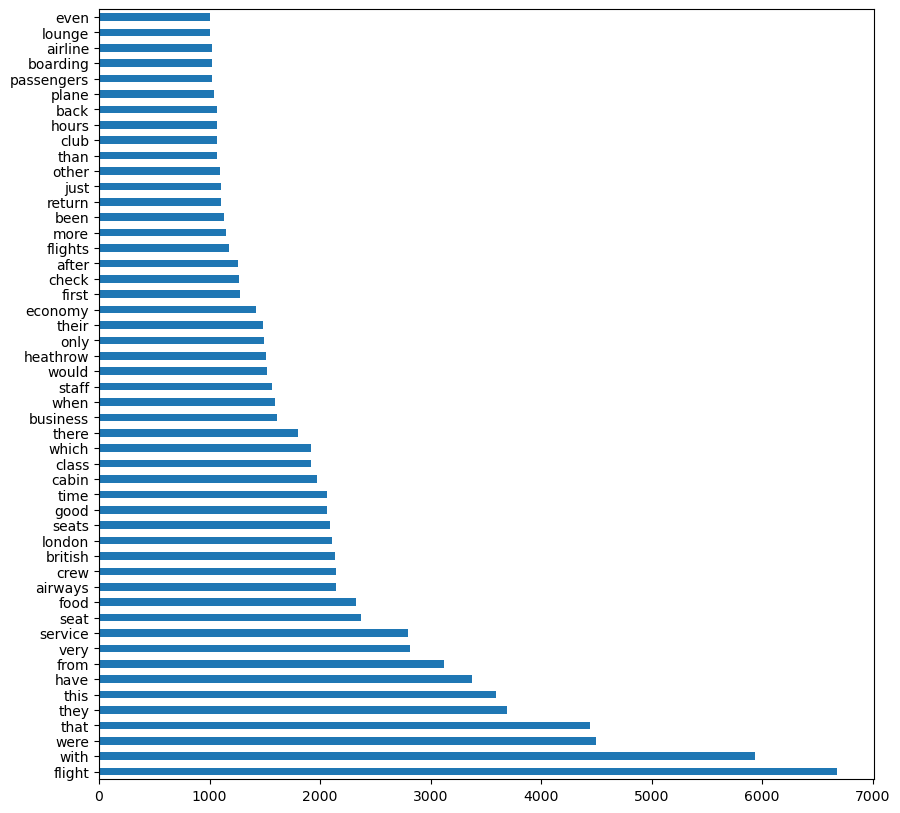

In [10]:
#plot graph of 50 commonly used words
plt.figure(figsize=(10,10))
freq_words.plot.barh(x=freq_words[0],y=freq_words[1])
plt.show()


In [11]:
#Text Clustering
categories=['negative','positive']
num_cat=len(categories)
num_cat

2

In [15]:
#TF=IDF Feature Generation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# Vectorize document using TF-IDF
tf_idf_vect = TfidfVectorizer(lowercase=True, stop_words='english', ngram_range=(1, 1), tokenizer=tokenizer.tokenize)

# Fit and transform Text Data
reviews_counts = tf_idf_vect.fit_transform(reviews)

# Check Shape of Count Vector
(reviews_counts.shape)




(3700, 12977)

In [20]:
#import KMeans Model
from sklearn.cluster import KMeans

#create Kmeans Object and fit it to the training data
kmeans=KMeans(n_clusters=num_cat).fit(reviews_counts)

#get the labels using Kmeans
pred_labels=kmeans.labels_
pred_labels

array([1, 1, 1, ..., 0, 0, 1])

In [21]:
clusters_centres=kmeans.cluster_centers_
clusters_centres

array([[1.86932858e-04, 1.20681046e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.18658740e-05],
       [0.00000000e+00, 0.00000000e+00, 6.65570571e-05, ...,
        1.60008798e-04, 6.46224435e-05, 0.00000000e+00]])

In [22]:
unique,counts=np.unique(pred_labels,return_counts=True)
dict(zip(unique,counts))

{0: 1479, 1: 2221}

In [25]:
from sklearn import metrics

# Assuming reviews_counts is your data
# Compute DBI Score
dbi = metrics.davies_bouldin_score(reviews_counts.toarray(), pred_labels)

# Compute Silhouette Score
ss = metrics.silhouette_score(reviews_counts.toarray(), pred_labels, metric="euclidean")

# Print the DBI and Silhouette scores
print("DBI Score:", dbi, "\nSilhouette Score:", ss)


DBI Score: 12.358936415902907 
Silhouette Score: 0.0068353684626375815


In [26]:
df_reviews=pd.DataFrame({'review':reviews,'label':pred_labels})
df_reviews

,review,label
0,Check fast friendly Security breeze Loung...,1
1,This first time have seen Club World su...,1
2,Flew business class from Doha London 31st ...,1
3,Starting Heathrow Terminal Check fairly...,1
4,Verified have flown this route with EasyJe...,0
...,...,...
3695,after baggage shut down First check easy...,1
3696,procedures Heathrow terminal were breeze...,1
3697,Easy check Gatwick with pods check pri...,0
3698,really have energy write very detail ...,0


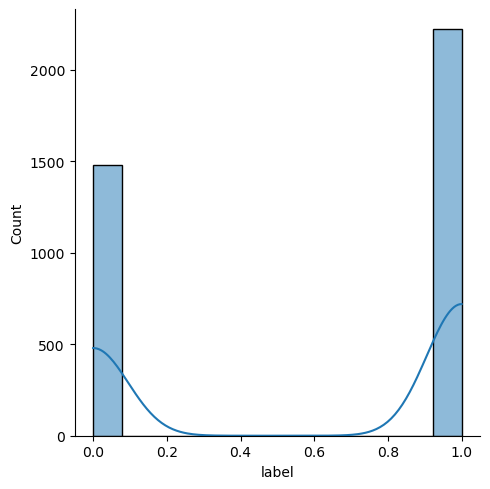

In [27]:
sns.displot(df_reviews['label'],kde=True)

In [28]:
positive_review=df_reviews[df_reviews['label']==1]
positive_review

,review,label
0,Check fast friendly Security breeze Loung...,1
1,This first time have seen Club World su...,1
2,Flew business class from Doha London 31st ...,1
3,Starting Heathrow Terminal Check fairly...,1
5,last minute business trip route regularl...,1
...,...,...
3689,travelled Club Europe from Gatwick Paphos ...,1
3690,outbound June Check lounge good normal ...,1
3695,after baggage shut down First check easy...,1
3696,procedures Heathrow terminal were breeze...,1


In [29]:
negative_review=df_reviews[df_reviews['label']==0]
negative_review

,review,label
4,Verified have flown this route with EasyJe...,0
6,Overall would disappointing status l...,0
9,told take hand luggage onto plane over...,0
10,Verified flight comfortable enough with ...,0
12,Waited hour check Paphos business check ...,0
...,...,...
3692,Travelling from Venice London Gatwick with Br...,0
3693,A319 Online check didn start working until ...,0
3694,Business Hard find much good about this...,0
3697,Easy check Gatwick with pods check pri...,0
